In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

In [29]:
linnerud = load_linnerud()

In [30]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [31]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [32]:
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [33]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [38]:
df_target

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [47]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [48]:
df.shape

(20, 3)

In [98]:
data = pd.concat([df,df_target['Pulse']], axis = 1)

In [99]:
data

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


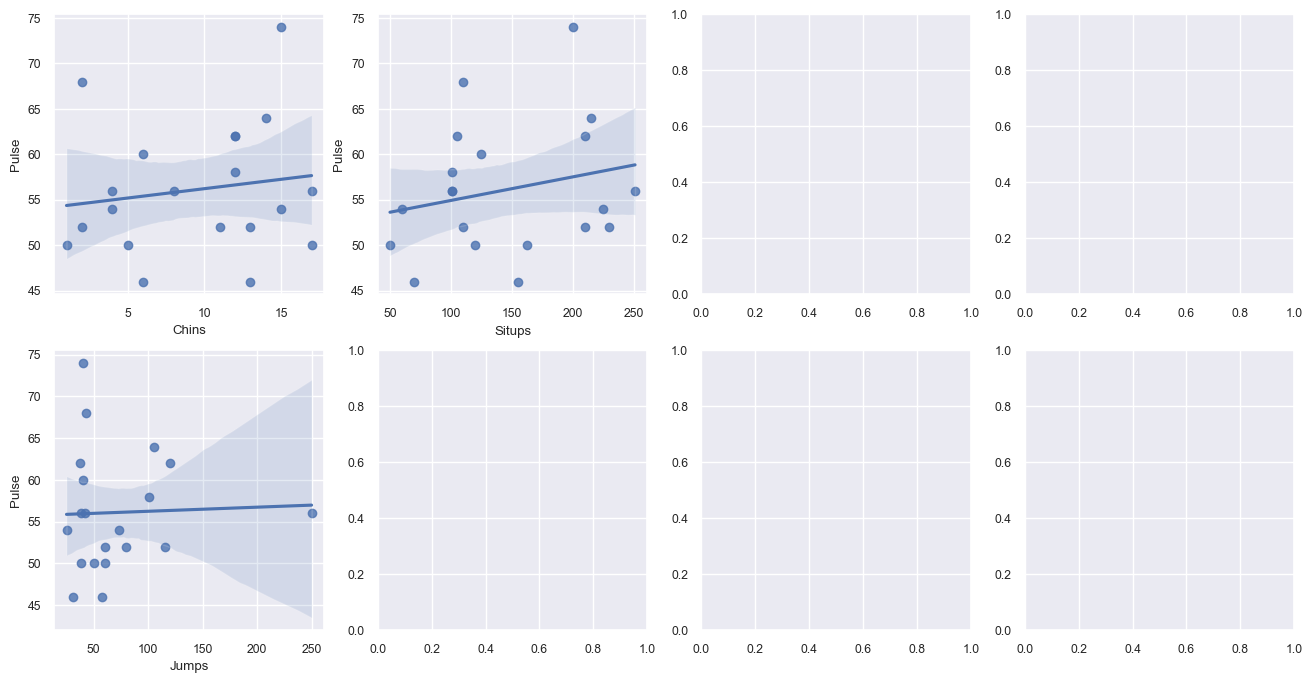

In [101]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[row][col])

In [102]:
df_corr = data.corr()

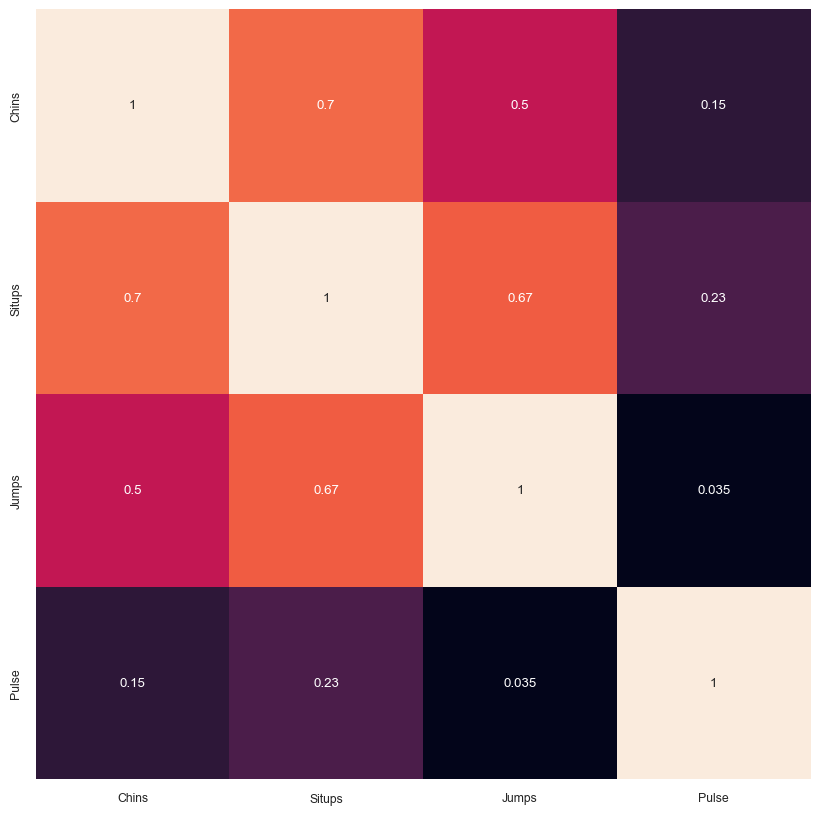

In [103]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Situps', 'Chins']]
y_data=data.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 2) (16,)
(4, 2) (4,)


In [106]:
X_train.head()

,Situps,Chins
14,70.0,6.0
16,60.0,4.0
10,120.0,17.0
8,200.0,15.0
5,101.0,4.0


In [107]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

In [108]:
lr = LinearRegression()

In [109]:
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [0.  0.4]
상수항(절편): 48.9


In [111]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 2) (4, 2)


In [112]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 80.923, RMSE: 8.996
Variance score : -0.893


In [113]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 48.879443847041316
회귀계수: [0.  0.4]


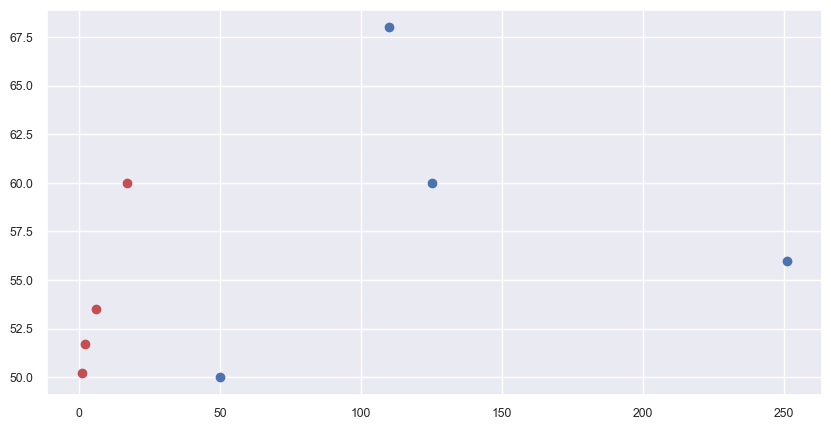

In [114]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

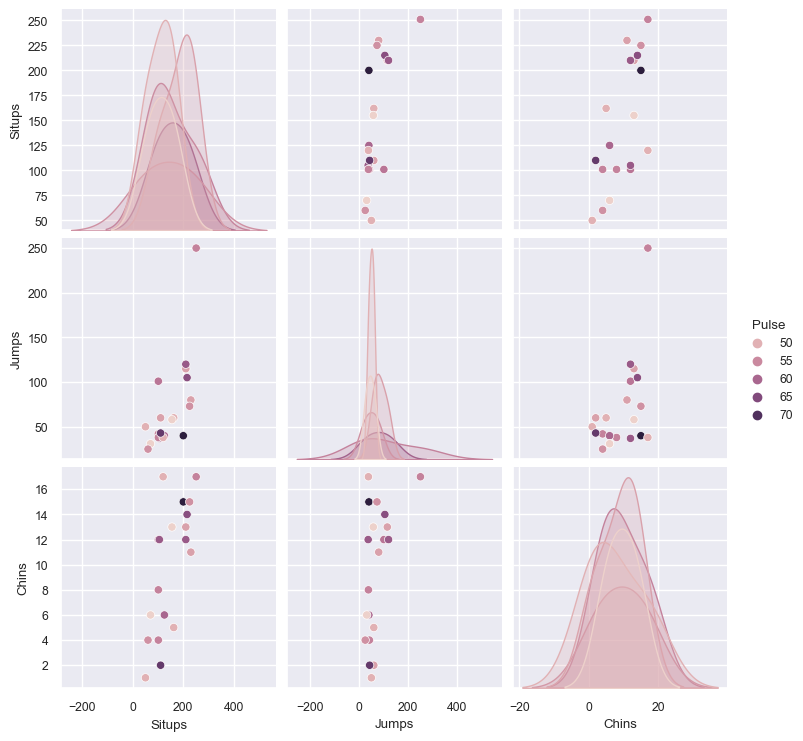

In [115]:
sns.pairplot(data,
             vars=['Situps','Jumps','Chins'],
            hue ='Pulse')
plt.show()

In [116]:
from sklearn.metrics import mean_absolute_error
y_prediction = lr.predict(X_test)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

6.7473761784266575


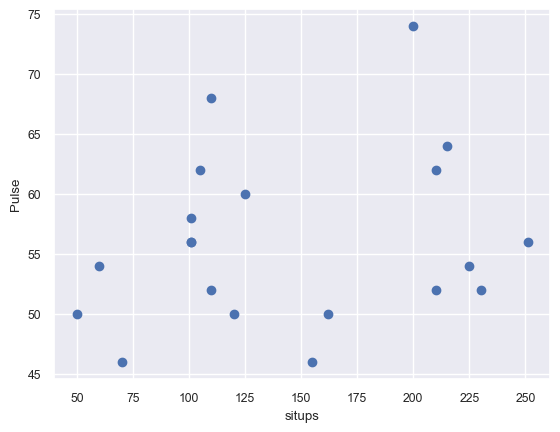

In [117]:
plt.scatter(data['Situps'], data['Pulse'])
plt.xlabel('situps')
plt.ylabel('Pulse')

plt.show()